In [1]:
#!/usr/bin/env python
""" 5. Pflichtübung für Maschinelles Lernen an der HS Mannheim zu k-nearest Neighbor"""

' 5. Pflichtübung für Maschinelles Lernen an der HS Mannheim zu k-nearest Neighbor'

In [2]:
__maintainer__ = "Rosario Allegro"

In [3]:
import string
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy
from enum import Enum
from typing import List, Tuple

# Pathfile and kNN-Value
fName = '/spiral.txt'
kValue = 3

# Vanilla-Daten
spiral_data = []

In [4]:
#@dataclass
class Node:
  def __init__(self, coord: List[float]) -> None:
    self.x = coord[0]
    self.y = coord[1]
    self.color = coord[2]
  
  def getX(self) -> float:
    return self.x

  def getY(self) -> float:
    return self.y

  def getColor(self) -> str:
    return self.color

In [5]:
# Vanilladaten verarbeiten
def proc_data(path: string, mode: string) -> None:
  f = open(path, mode)
  for x in f:
    x = x.strip()
    x = x.split(";")
    spiral_data.append(Node([float(i) for i in x]))
  f.close()

# Dateneingabe für Vanilladaten
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  proc_data("/content/drive/My Drive%s" % (fName), "r")
else:
  proc_data("%s" % (fName), "r")

Mounted at /content/drive


In [6]:
class Knn:
  _x, _y, _color = [], [], []
  def __init__(self, listOfNodes: List[float], kValue: int) -> None:
    self._data = copy.deepcopy ( listOfNodes )
    self._k = kValue
    self.__init_data()

  def __init_data(self) -> None:
    for node in self._data:
      self._x.append(node.getX())
      self._y.append(node.getY())
      
      if(node.getColor()==-1):
        self._color.append('blue')
      else:
        self._color.append('red')

  def add_node(self, newNode: Node) -> None:

    # Neue Liste für Abstände
    list_elements = []

    # Berechne Abstände der Nodes
    list_elements = list((self.__get_distance(prototype_node, newNode), prototype_node.getColor()) for prototype_node in spiral_data)
    
    # Zugehörige Klasse des neuen Node bestimmen
    calculated_class = self.__calc_neighbor(list_elements)

    # neuen Node mit dazugehörige Klasse hinzufügen
    self._x.append(newNode.getX())
    self._y.append(newNode.getY())
    self._color.append(calculated_class)

  # Farbe bestimmen des neuen Node
  def __calc_neighbor(self, list_elements: Tuple[float, int]) -> str:
    
    self.__Sort(list_elements)
    
    blue, red = 0,0
    for index in range(self._k):
      if list_elements[index][1]==1:
        red += 1
      else:
        blue += 1
    
    if (blue > red):
      return 'blue'
    else:
      return 'red'

  # Listenelemente sortieren
  def __Sort(self, to_sort: Tuple[float, int]) -> Tuple[float, int]: 
    to_sort.sort(key = lambda x: x[0], reverse=False) 
    return to_sort

  # Distanz zwischen zwei Nodes berechnen
  def __get_distance(self, fromNode: Node, toNode: Node) -> List[Node]:
    return math.sqrt(((fromNode.getX() - toNode.getX()) ** 2) + (fromNode.getY() - toNode.getY()) ** 2)

  # Visualisierung
  def visualisation(self) -> None:
    plt.scatter(self._x, self._y, c=self._color)
    plt.show()

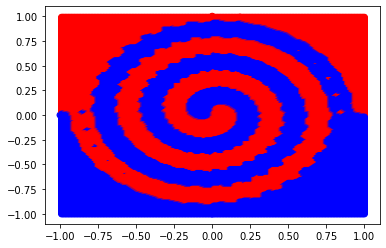

'\n# Zweites Bild _____________\nk2 = Knn(spiral_data, 5)\n\n#0,01 Schritten\nx, y = -1.0, 1.0\nfor y_idx in range(200):\n  y -= 0.01\n  for x_idx in range(200):\n    x += 0.01\n    k2.add_node(Node([x, y, 0]))\n  x = -1.0\nk2.visualisation()\n'

In [7]:
# create vanilla-data:
#dh = Datahandler(fName)

# Erstes Bild _____________
k1 = Knn(spiral_data, kValue)

#0,01 Schritten
x, y = -1.0, 1.0
for y_idx in range(200):
  y -= 0.01
  for x_idx in range(200):
    x += 0.01
    k1.add_node(Node([x, y, 0]))
  x = -1.0

k1.visualisation()

'''
# Zweites Bild _____________
k2 = Knn(spiral_data, 5)

#0,01 Schritten
x, y = -1.0, 1.0
for y_idx in range(200):
  y -= 0.01
  for x_idx in range(200):
    x += 0.01
    k2.add_node(Node([x, y, 0]))
  x = -1.0
k2.visualisation()
'''